# Исследование стартапов
Автор: Никита Логунов

## Описание данных

Таблица `acquisition`
Содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

Таблица `company_and_rounds`
Содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

Таблица `education`
Содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

Таблица `people`
Содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

Таблица `degrees`
Содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

Дополнительные таблицы

Таблица `fund`
Содержит информацию о фондах:
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.

Таблица `investment`
Содержит информацию о раундах инвестирования:
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

## Цели и задачи

**Цель:**
Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы:
- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что означают покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику;
- выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.
 
**Задачи:**
1. Шаг 1. Знакомство с данными: загрузка и первичная предобработка
2. Шаг 2. Предобработка данных, предварительное исследование
3. Шаг 3. Исследовательский анализ объединённых таблиц
4. Шаг 4. Итоговый вывод и рекомендации

## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

### 1.1. Вывод общей информации, исправление названия столбцов

Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции.

In [7]:
# Устанавливаем библиотеки
#!pip install phik -U
!pip install matplotlib-venn -q
!pip install missingno -q

In [11]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from matplotlib_venn import (venn2, venn3)

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
# from phik import phik_matrix

In [14]:
# Загрузим датасеты в переменные 
PATH = "https://code.s3.yandex.net/datasets/"
acquisition=pd.read_csv(PATH + 'acquisition.csv')
company_and_rounds=pd.read_csv(PATH + 'company_and_rounds.csv')
degrees=pd.read_csv(PATH + 'degrees.csv')
education=pd.read_csv(PATH + 'education.csv')
fund=pd.read_csv(PATH + 'fund.csv')
investment=pd.read_csv(PATH + 'investment.csv')
people=pd.read_csv(PATH + 'people.csv')

Познакомимся с данными датасетов — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`. Cделаем это через цикл:

In [19]:
datasets = [acquisition, company_and_rounds, people, degrees, education, fund, investment]
datasets_names = ['acquisition', 'company_and_rounds', 'people', 'degrees', 'education', 'fund', 'investment']
for df, df_name in zip(datasets, datasets_names):
    print(f"\nНазвание датасета: {df_name}")
    print("\nИнформация о датасете:")
    print(df.info())
    print("\nПервые строки датасета:")
    print(df.head())
    print('_________________________________')



Название датасета: acquisition

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB
None

Первые строки датасета:
   id  acquiring_company_id  acquired_company_id term_code  price_amount  \
0   1                    11                   10       NaN      20000000   
1   7                    59                   72      cash      60000000   
2   8                    24                  132      cash     280000000   
3   9                    59                  155    

Проверим названия столбцов и есть ли в датасетах полные дубликаты строк.

In [21]:
# Выводим названия столбцов датафреймов
for df, df_name in zip(datasets, datasets_names):
    print(f'\nНазвания столбцов датасета {df_name}:')
    print('')
    print(df.columns)
    print('_____________________')


Названия столбцов датасета acquisition:

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')
_____________________

Названия столбцов датасета company_and_rounds:

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')
_____________________

Названия столбцов датасета people:

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')
_____________________

Названия столбцов датасета degrees:

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')
_____________________

Названия сто

В датасете `company_and_rounds` есть два столбца с практически одинаковыми названиями `company  ID` и `company  id`. Проверим с помощью диаграммы Венна, насколько данные в этих столбцах совпадают.

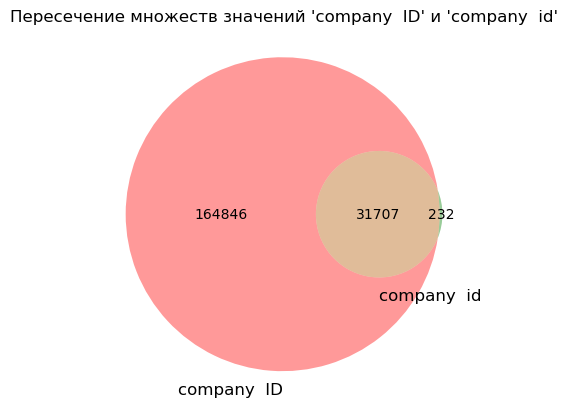

In [23]:
#Создадим копию датафрейма, чтобы не работать с исходным
company_and_rounds_df = company_and_rounds.copy()

# Создаем множества из уникальных значений столбцов company  ID и company  id
first_id = set(company_and_rounds_df['company  ID'].dropna().unique())
second_id = set(company_and_rounds_df['company  id'].dropna().unique())

#Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

#Отображаем график
plt.title("Пересечение множеств значений 'company  ID' и 'company  id'")
plt.show()

Праксически все значенния из `company  id` встерчаются в `company  ID`. Проверим, сколько из них не совпадают построчно.

In [25]:
# Очистим от дубликатов по 'company  ID' company_and_rounds_df
company_and_rounds_df = company_and_rounds_df.drop_duplicates(subset=['company  ID'])

In [26]:
# Проверим, сколько в датафрейме  строк, в которых не совпадают занчиения в исследуемых столбцах
len(company_and_rounds_df[ company_and_rounds_df['company  ID'] != company_and_rounds_df['company  id'] ])

164847

В датасете 164847 строк, где значения  в столбцах `company  id` и `company  ID` не совпадают. Практически то же количество несовпадений показывает диаграмма Венна (на 1 меньше). Можно сказать, что столбцы дублируются по значениям. Можно предположить, что датасет `company_and_rounds` был образован в результате соединения двух датафреймов (так как в последних девяти столбцах одинаковое практически одинаковое количество пропусков).

In [29]:
# Проверим, есть ли в датасетах полные дубликаты строк
for df, df_name in zip(datasets, datasets_names):
    print(f'\nКоличество полных дубликатов в датасете {df_name}: {df.duplicated().sum()}')


Количество полных дубликатов в датасете acquisition: 0

Количество полных дубликатов в датасете company_and_rounds: 0

Количество полных дубликатов в датасете people: 0

Количество полных дубликатов в датасете degrees: 0

Количество полных дубликатов в датасете education: 0

Количество полных дубликатов в датасете fund: 0

Количество полных дубликатов в датасете investment: 0


**Промежуточные выводы** после знакомства с данными:
* В датасете `acquisition` 6 столбцов и 9407 строк, типы данных корректны, кроме столбца `acquired_at` - его нужно привести к типу `datetime64`. Пропуски есть в столбце `term_code` и `acquired_at`.
* В датасете `company_and_rounds` 22 столбца и 217774 строки, типы данных корректны, кроме столбцов `founded  at`, `closed  at`, `funded  at` - их нужно привести к типу `datetime64`. Пропуски есть во всех столбцах. Нужно будет их проанализировать. Возможно, есть вообще пустые строки. Столбцы `company  ID` и `company_id` дублируют друг друга: возможно, этот датасет был образован в результате соединения двух датафреймов.
* В датасете `people` 5 столбцов и 226709 строки, типы данных корректны. Пропуски есть во всех столбцах, кроме `id`. Нужно будет их проанализировать. Возможно, удалить строки, где данные есть только в столбце `id`.
* В датасете `degrees` 4 столбца и 109610 строк, типы данных корректны, кроме столбца `object_id` - его нужно привести к целочисленному типу, оставив только цифры в записях (чтобы корректно объединить с датасетом `people`, если это будет необходимо). Пропуски есть в столбцах `degree_type` и `subject`.
* В датасете `education` 4 столбца и 109610 строк, типы данных корректны, кроме столбца `graduated_at` -  его нужно привести к типу `datetime64`. Пропуски есть в столбцах `instituition` (строки с этими пропусками, скорее всего, удалим) и `graduated_at`.
* В датасете `fund` 9 столбцов и 11652 строки, типы данных корректны, кроме столбца `founded_at` -  его можно привести к типу `datetime64`. Пропуски есть во всех столбцах, кроме `id`.
* В датасете `investment` 4 столбца и 61403 строки, типы данных корректны, пропусков нет.

Названия столбцов корректны во всех датасетах, кроме `company_and_rounds` - здесь их необходимо привести к 'snake_case'.
Полных дубликатов строк в датасетах не обнаружено.
___

### 1.2. Смена типов и анализ пропусков
Обработаем типы данных в столбцах, которые хранят значения даты и времени.

In [34]:
# Но для начала приведем все столбцы датафрейма company_and_rounds к виду 'snake_case':
for col in company_and_rounds.columns:
    str_bad = col
    str_bad = str_bad.replace('  ', '_')
    company_and_rounds = company_and_rounds.rename(columns={col: str_bad})

In [35]:
# Выводим названия столбцов датафрейма company_and_rounds
company_and_rounds.columns 

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [36]:
# Переименуем столбец company_id в id_company, чтобы не перепутать со столбцом company_id других датасетов
company_and_rounds = company_and_rounds.rename(columns={'company_id': 'id_company', 'company_ID': 'company_id'})

Напишем функцию, которая приведет все столбцы с окончанием '_at' в формат даты и времени.

In [39]:
# Функция для обработки столбца и преобразования в datetime
def process_to_datetime(column):
    # Проверяем, содержит ли название столбца '_at'
    if '_at' in column.name:
        # Преобразуем в datetime
        return pd.to_datetime(column)
    # Возвращаем столбец без изменений
    return column

# Основная функция для обработки датасетов
def process_datasets(dataset_dict, column_processor):
    # Проходим по каждому датасету в словаре
    for dataset_name, dataset in dataset_dict.items():
        # Проходим по каждому столбцу
        for column_name in dataset.columns:
            # Применяем функцию
            dataset[column_name] = column_processor(dataset[column_name])
    return dataset_dict

# Словарь датасетов
dataset_dict = {
	'acquisition': acquisition,
	'company_and_rounds': company_and_rounds,
    'education': education,
    'people': people,
    'degrees': degrees,
    'education': education,
    'fund': fund
}

# Обрабатываем датасеты
processed_datasets = process_datasets(dataset_dict, process_to_datetime)

In [43]:
# Удалим лишние символы из значений столбца degrees['object_id'], чтобы преобразовать в целочисленный тип
degrees['object_id'] = degrees['object_id'].str.replace('p:', '')

In [45]:
# Теперь преобразуем degrees['object_id'] в целочисленный тип наименьшей разрядности
degrees['object_id'] = pd.to_numeric(degrees['object_id'], downcast='integer')

Все необходимые преобразования сделаны:
- все столбцы датафрейма `company_and_rounds` приведены к виду 'snake_case';
- столбцы со значениями даты и времени приведены к корректному типу данных `datetime64`;
- столбец `object_id` датафрейма `degrees` преобразован в целочисленный тип наименьшей разрядности (предварительно были удалены лишние символы).

Изучим количество пропусков в датасетах с абсолютном и относительном значении:

In [47]:
for df, df_name in zip(datasets, datasets_names):
    missing_stats = pd.DataFrame({'Кол-во пропусков': df.isnull().sum(),'Доля пропусков': df.isnull().mean().round(4)})
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    if not missing_stats.empty:
        print(f'\nПропуски в датасете {df_name}:')
        print(missing_stats)
        print('_________________________________')


Пропуски в датасете acquisition:
             Кол-во пропусков  Доля пропусков
term_code                7576          0.8054
acquired_at                29          0.0031
_________________________________

Пропуски в датасете company_and_rounds:
                       Кол-во пропусков  Доля пропусков
company  ID                         302          0.0014
name                                303          0.0014
category  code                    73888          0.3393
status                              302          0.0014
founded  at                      107818          0.4951
closed  at                       214325          0.9842
domain                            70615          0.3243
network  username                122240          0.5613
country  code                    109167          0.5013
investment  rounds                  302          0.0014
funding  rounds                     302          0.0014
funding  total                      302          0.0014
milestones               

В пункте 2.4 мы будем подробно изучать датасет `company_and_rounds`, поэтому проанализируем пропуски в данных этого датасета более досконально.

<Axes: >

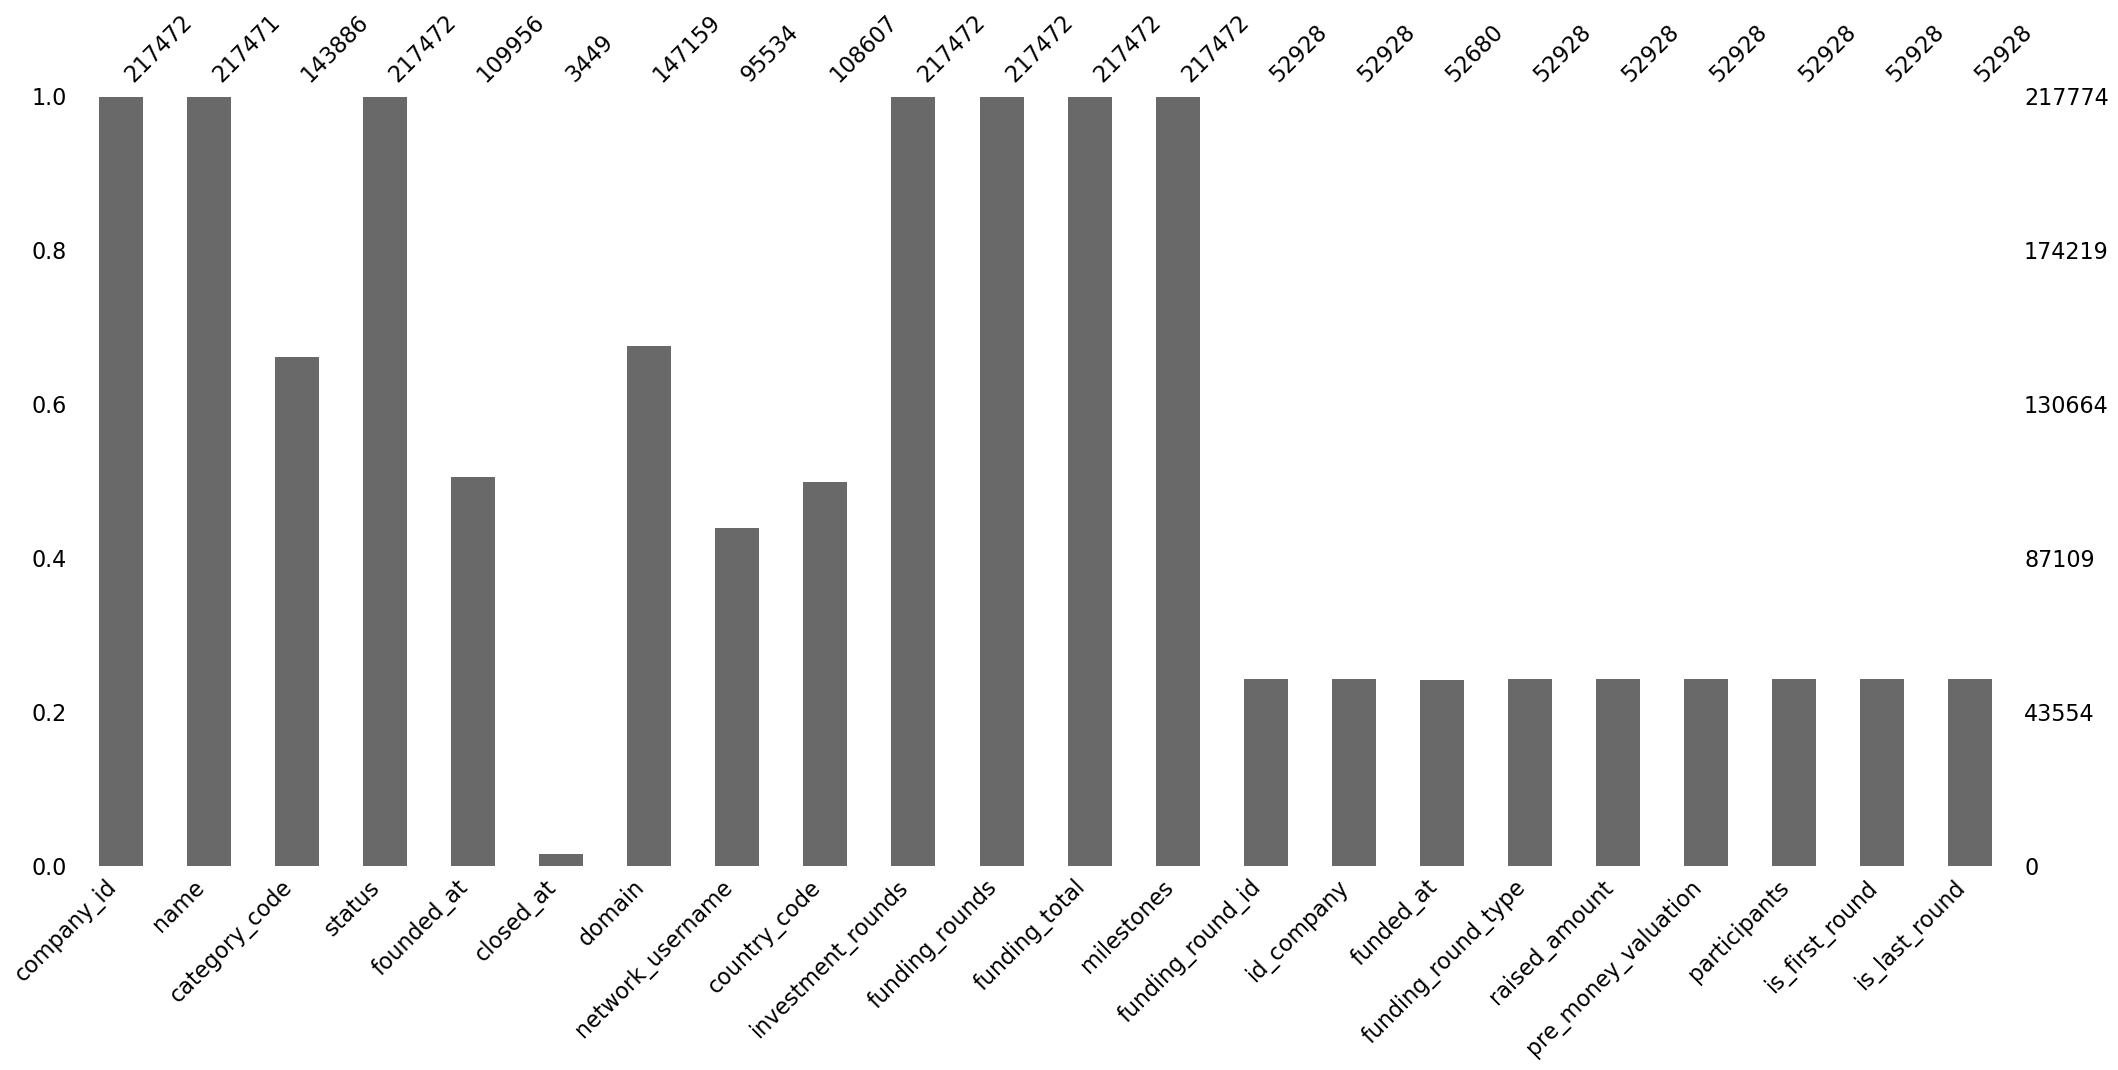

In [49]:
# Визуализируем количество пропусков в company_and_rounds
msno.bar(company_and_rounds)

Сразу видно, что у очень малого количества компаний есть информация о дате закрытия. У примерно половины компаний нет информации о дате основания, стране и нике в сети. И практически одинаковое количество пропусков во всех столбцах начиная с `funding_round_id`.

<Axes: >

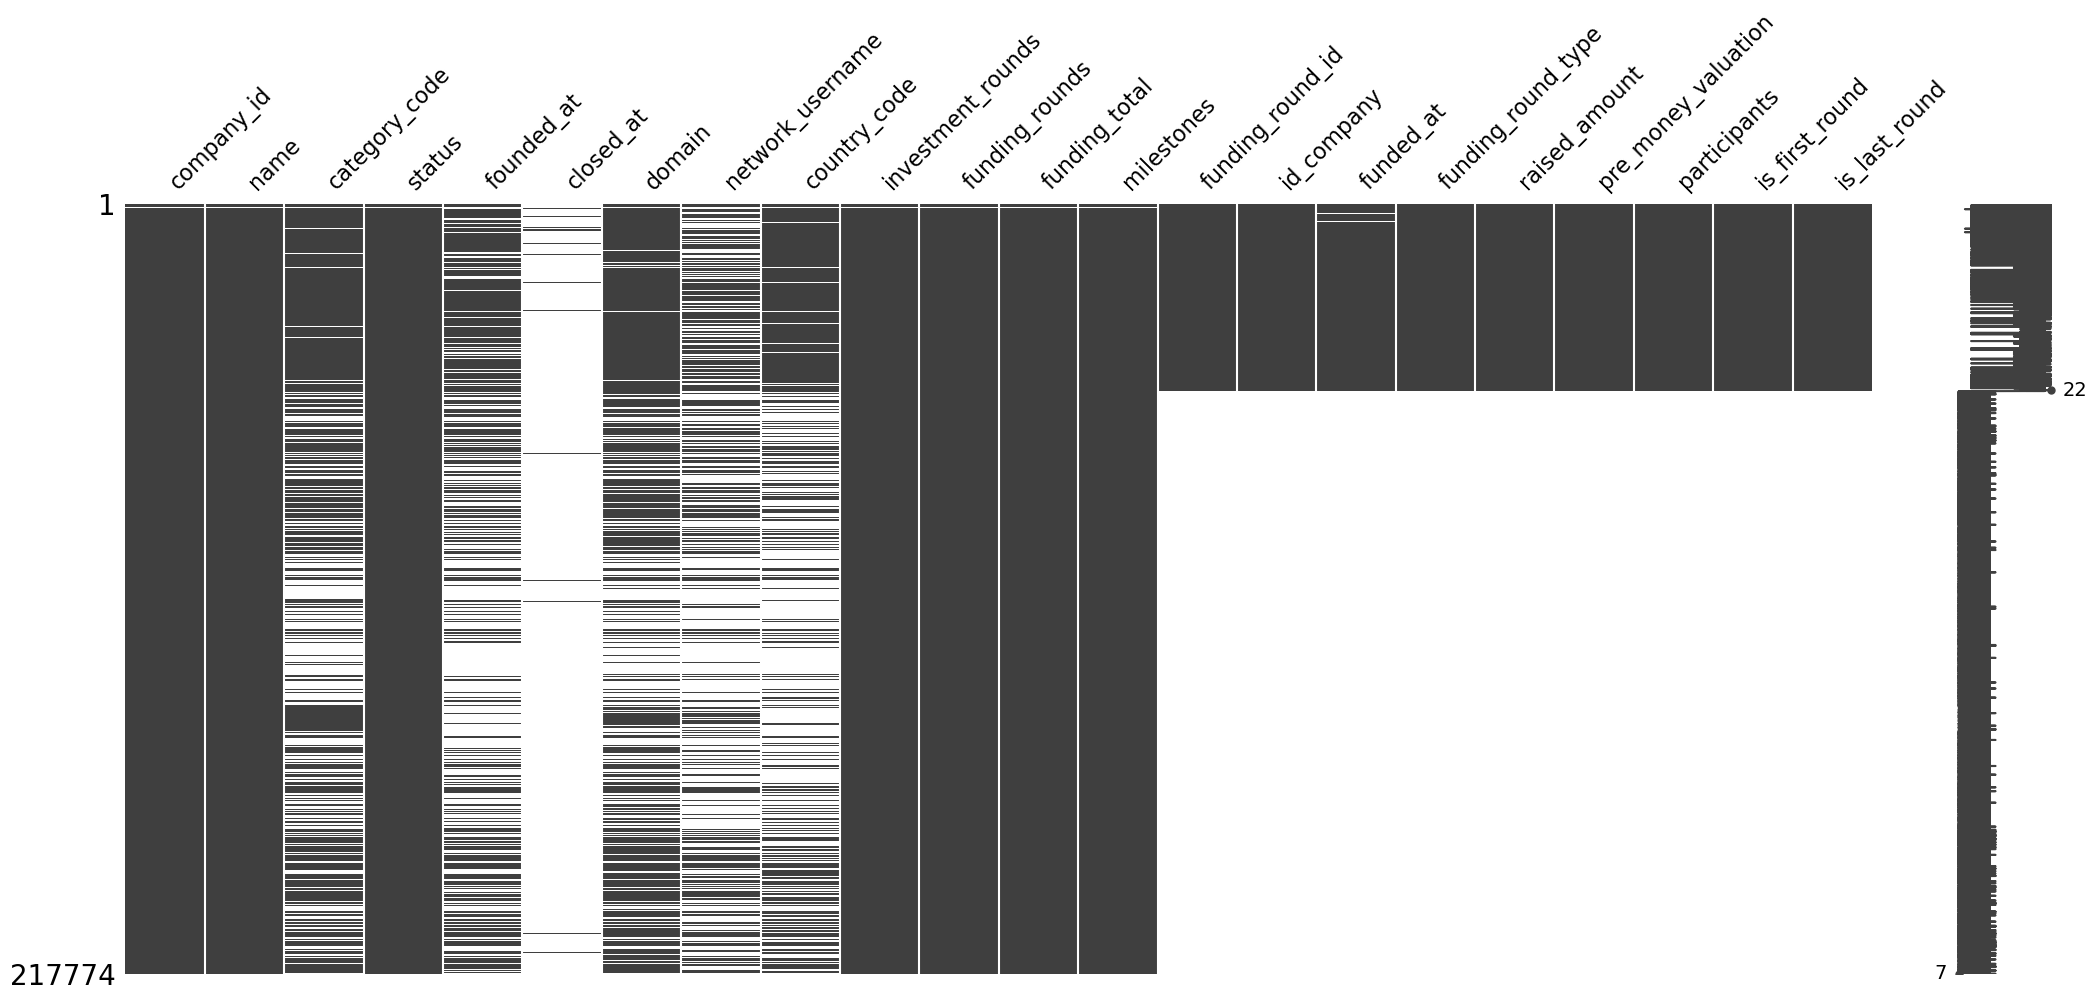

In [51]:
# Визуализируем структуру пропусков в company_and_rounds, отсортировав датасет по funding_round_id 
msno.matrix(company_and_rounds.sort_values(by='funding_round_id'))

В столбцах с пропусками до `funding_round_id` пропуски, судя по диаграмме, встречаются равномерно. Отосортированные по `funding_round_id` пропуски в датафрейме `company_and_rounds` говорят нам о том, что гипотеза о присоединении к датафрейму с компаниями датафрейма с раундами их финансирования подтверждается. Большей части компаний просто не нашлось соответствий в присоединяемом через `how='left'` датафрейме, поэтому поля заполнились пропусками.

<Axes: >

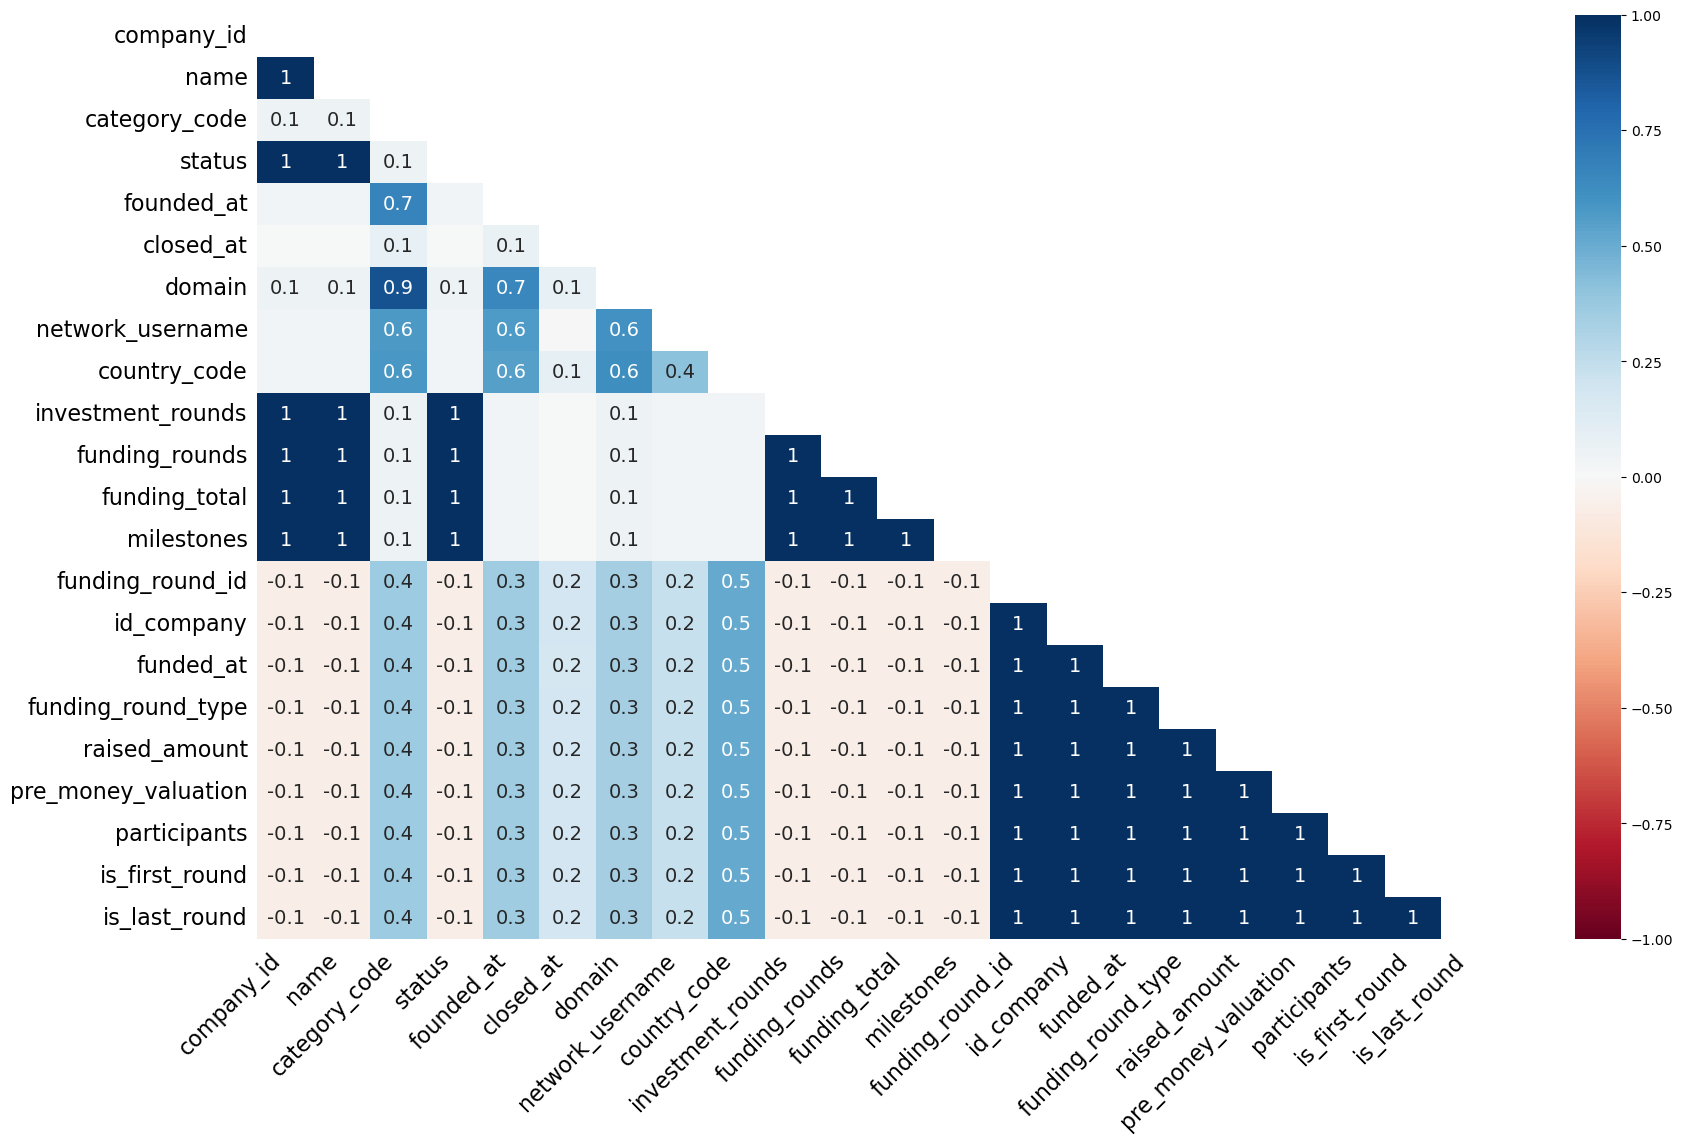

In [53]:
# Визуализируем силу связи наличия пропусков в одном столбце с появлением пропусков в другом столбце
msno.heatmap(company_and_rounds)

Пропуски в столбцах начиная с `funding_round_id` сильно положительно связаны. Сильная связь также, например, у пропусков в поле `domain` с пропусками в поле `category_code`. А пропуски в `category_code` и `domain` достаточно сильно связаны с пропусками в `founded_at`.

- В датасете `acquisition` в столбце `term_code` 81% пропусков - слишком большое количество, заполнить их достоверно не представляется возможным, поэтому оставим как есть.
- Датасет `company_and_rounds`: во многих полях одинаковая доля пропусков (76%) - он был, очевидно, образован слиянием двух датасетов, результатом чего и являются эти пропуски, заполнить их достоверно не представляется возможным, поэтому оставим как есть.
- В датасете `people` для 85% записей не указан `company_id` - то есть эти люди не являются сотрудниками компаний. Для решения задач проекта они нам не нужны. Поэтому оставим пропуски как есть.

**Промежуточный вывод:** данные сырые и предобработке можно посвятить большое количество времени, но для решения задач проекта, на первый взгляд, данных достаточно. Для объединения датафреймов `acquisition` и `company_and_rounds` будем использовать столбцы `acquired_company_id` и `id_company`, а для объединения датафреймов `people`, `education` и `degrees` можно использовать столбцы `id`, `person_id` и `object_id`. Пропусков в данных много, однако заполнить их достоверно не представляется возможным и в этом часто нет необходимости для решения задач проекта, поэтому оставляем пропуски как есть. 

## Шаг 2. Предобработка данных, предварительное исследование

### 2.1. Раунды финансирования по годам
Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

In [61]:
# Выделим год из даты в отдельный столбец, ведь нам нужна группировка по годам
company_and_rounds['funded_at_year'] = company_and_rounds['funded_at'].dt.year

In [62]:
# Приведем год к целочисленному типу
company_and_rounds['funded_at_year'] = company_and_rounds['funded_at_year'].astype('Int64')

In [63]:
# Создадим сводную таблицу
pivot_table1 = pd.pivot_table(
    company_and_rounds,
    index = 'funded_at_year',
    values = 'raised_amount',
    aggfunc = {'raised_amount': ['median', 'count']}
)

Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

In [65]:
# Отфильтруем таблицу по условию
pivot_table1 = pivot_table1[pivot_table1['count'] > 50]
# Приведем суммы к миллионам
pivot_table1['median'] = pivot_table1['median'] / 1000000

Приведем прошлую цену в настоящую для более корректного сравнения. Для этого рассчитаем коэффцициент дефляции для каждого года (по сравнению с 2013 годом). Дефляторы запишем в словарь. Создадим копию сводной таблицы, чтобы не работать с исходной. И создадим в итоге новый датафрейм с типичными суммами  денежных средств, приведенными к покупательской способности доллара в 2013 году.

In [67]:
# Создадим копию сводной таблицы, чтобы не работать с исходной, сбросим индекс
pivot_table2 = pivot_table1.reset_index()

In [68]:
# Дефляторы запишем в словарь по годам
cpi = {
    1999: 166.6, 2000: 172.2, 2001: 177.1, 2002: 179.9,
    2003: 184.0, 2004: 188.9, 2005: 195.3, 2006: 201.6,
    2007: 207.3, 2008: 215.3, 2009: 214.5, 2010: 218.1,
    2011: 224.9, 2012: 229.6, 2013: 233.0
}

In [69]:
# Напишем цикл для расчета и применения коэффициента дефляции
for i, year in enumerate(pivot_table2['funded_at_year']):
    deflator = cpi[2013] / cpi[year]
    pivot_table2.loc[i, 'median'] *= deflator

In [70]:
# Назначим годы финансирования индексами
pivot_table2 = pivot_table2.set_index('funded_at_year')

На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

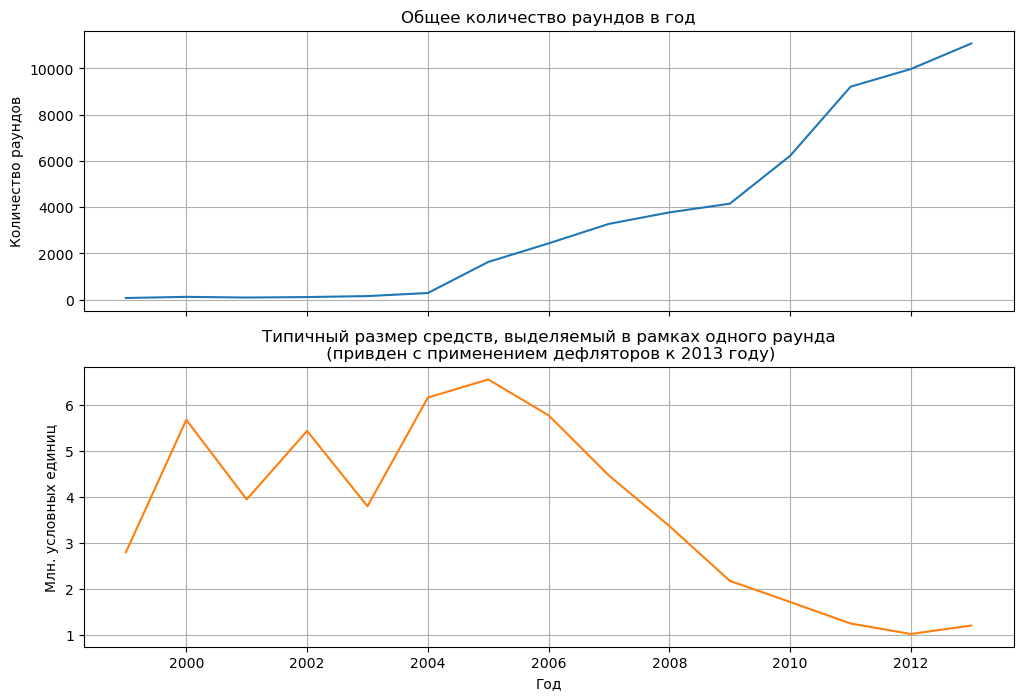

In [72]:
# Построим линейные графики на одной оси X на основе данных отфильтрованной сводной таблицы
axes = pivot_table2.plot(
    kind='line',
    subplots=True,
    sharex=True,
    sharey=False,
    legend=False,
    rot=0,
    figsize=(12,8),
    title=['Общее количество раундов в год', 'Типичный размер средств, выделяемый в рамках одного раунда\n (привден с применением дефляторов к 2013 году)']
)
axes[0].set_ylabel('Количество раундов')
axes[1].set_ylabel('Млн. условных единиц')
axes[1].set_xlabel('Год')
axes[0].grid()
axes[1].grid()
plt.show()

Типичный размер средств, выделяемый в рамках одного раунда, был минимален в 2012 г. и незначительно увеличился в 2013 году. С 2004 до 2013 наблидается тенденция к увеличению количества раундов в год, а типичный размер средств в расчете на один раунд в период 2005-2012 имеет тенденцию к снижению. Скорее всего, общую сумму финансирования в году просто стали разбивать на бОльшее количество раундов, что и повлияло на снижение показателя финансирования в расчете на один раунд. Все суммы выражены в миллионах и приведены к 2013 году с применением рассчитанного для каждого года по отношению к 2013-му коэффициента дефляции.


### 2.2. Люди и их образование

Выясним, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.
Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.


#### 2.2.1 Провека на неявные дубликаты
Проверим датафреймы на дубликаты перед объединением. В `education` дубликатами булем считать строки, где данные в `person_id`, `instituition`, `graduated_at` совпадают.

In [79]:
# Проверяем на дубликаты датафрейм  education
education[education.duplicated(subset=['person_id','instituition','graduated_at'], keep=False)].sort_values(by='person_id')

,id,person_id,instituition,graduated_at
700,700,2,"University of California, Berkeley",1994-01-01
699,699,2,"University of California, Berkeley",1994-01-01
491,492,298,Santa Clara University,NaT
492,493,298,Santa Clara University,NaT
61472,61469,406,Stanford University,NaT
...,...,...,...,...
109530,109531,268486,Universidad de Sevilla,NaT
109588,109589,268517,University of Massachusetts,NaT
109589,109590,268517,University of Massachusetts,NaT
109595,109596,268520,Waseda University,NaT


Обнаружено 8001 дублирующихся строк. Удалим дубликаты, они искажают данные.

In [81]:
# Запишем количество и долю дубликатов в переменные
initial_row_count_e = len(education)
count_duplicates_e = education.duplicated(subset=['person_id','instituition','graduated_at']).sum()
duplicates_share_e = round(count_duplicates_e / initial_row_count_e * 100, 2)
print(f'Количество удаляемых дубликатов: {count_duplicates_e}')
print(f'Процент удаляемых дубликатов: {duplicates_share_e}')

Количество удаляемых дубликатов: 4138
Процент удаляемых дубликатов: 3.78


In [82]:
# Удаляем дубликаты, оставляем последнюю запись об образовании - будем считать ее актуальной
education = education.drop_duplicates(subset=['person_id','instituition','graduated_at'], keep='last')

Теперь проверим датафрейм `people` - здесь дубликатами будем считать строки с одинаковыми данными в столбцах `first_name`, `last_name` и `company_id` (так как сотрудник мог в разное время работать в разных компаниях).

In [84]:
# Проверяем на дубликаты датафрейм  people
people[people.duplicated(subset=['first_name','last_name','company_id'], keep=False)].sort_values(by='last_name')

,id,first_name,last_name,company_id,network_username
111586,224238,Ilhwan,(James) Kwon,NaN,NaN
111585,224237,Ilhwan,(James) Kwon,NaN,NaN
23108,128718,BravoSoftSolution,-,NaN,BravoTrichy
21403,126865,BravoSoftSolution,-,NaN,NaN
106971,219914,Duncan,A,NaN,NaN
...,...,...,...,...,...
1752,102132,x,xx,NaN,NaN
13173,116555,x,xx,NaN,NaN
32245,142093,NaN,NaN,NaN,NaN
42260,153095,NaN,NaN,NaN,NaN


Обнаружено 18544 дублирующихся строк. Удалим дубликаты, они искажают данные.

In [86]:
# Запишем количество и долю дубликатов в переменные
initial_row_count_p = len(education)
count_duplicates_p = people.duplicated(subset=['first_name','last_name','company_id']).sum()
duplicates_share_p = round(count_duplicates_p / initial_row_count_p * 100, 2)
print(f'Количество удаляемых дубликатов: {count_duplicates_p}')
print(f'Процент удаляемых дубликатов: {duplicates_share_p}')

Количество удаляемых дубликатов: 10404
Процент удаляемых дубликатов: 9.86


In [87]:
# Удаляем дубликаты, оставляем последнюю запись - будем считать ее актуальной
people = people.drop_duplicates(subset=['first_name','last_name','company_id'], keep='last')

Датафреймы перед объединением были очищены от неявных дубликатов:
- в датафрейме `education` удалено 4138 строк, или 3.78% данных;
- в датафрейме `people` удалено 10404 строк, или 9.86% данных.

Объединим датафреймы.

#### 2.2.2 Объединение датафреймов

In [91]:
# Объединяем таблицы через left, чтобы не потерять данные о сотрудниках, даже если у них не указано образование
people_education = people.merge(education, left_on='id', right_on='person_id', how='left', suffixes = ('_people','_education'))

In [93]:
people_education

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
251787,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
251788,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01
251789,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01
251790,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


In [94]:
# Удаляем дубдирующийся столбец после объединения датафреймов
people_education = people_education.drop('person_id', axis=1)

In [96]:
# Создадим столбец-индикатор образования сотрудников (будем считать образованными тех,
# у хого есть данные либо об университете, либо о дате выпуска)
people_education['educated'] = people_education['instituition'].notna() | people_education['graduated_at'].notna() 

Проверим, сколько получилось записей об образованных сотрудниках и сколько записей всего:

In [99]:
f'Записей о Сотрудниках с образованием (учитываются данные либо об университете, либо о дате выпуска, либо тип образования, либо специальность): {people_education['educated'].sum()}'

'Записей о Сотрудниках с образованием (учитываются данные либо об университете, либо о дате выпуска, либо тип образования, либо специальность): 101067'

In [100]:
f"Записей о всех сотрудниках {len(people_education['educated'])}"

'Записей о всех сотрудниках 251792'

In [101]:
f"Записей о сотрудниках без образования {len(people_education['educated']) - people_education['educated'].sum()}, или {round((len(people_education['educated']) - people_education['educated'].sum())/len(people_education['educated'])*100, 1)}%"

'Записей о сотрудниках без образования 150725, или 59.9%'

Сотрудников без образования 59.9% - довольно много. Посмотрим, как они распределены по группам компаний в зависимости от их размера.
Таблицу `degrees` присоединять не будем, так как  информация, в ней содержащаяся, детализирует информацию об образовании, а в данном разделе это не так важно, как само наличие образования у сотрудника.

#### 2.2.3 Категоризация данных

Нам нужно посчитать количество сотрудников в каждой из компаний. Чтобы две записи с разным образованием у одного сотрудника не воспринимались как два сотрудника, оставим каждому сотруднику по одной записи об образовании.

In [107]:
# Посчитаем количество сотрудников в каждой компании и запишем в переменную count_people
count_people = people_education.groupby('company_id')['id_people'].nunique()

In [109]:
# Сбросим индекс и переименуем столбец id_people для корректного присоединения к основному датафрейму
count_people = count_people.reset_index().rename(columns={'id_people': 'count_people'})

In [110]:
# Присоединим count_people к основному датафрейму
people_education = people_education.merge(count_people, on='company_id')

Мы подсоединили `count_people` к датафрейму `people_education` через inner, чтобы оставить только те записи, где у сотрудников есть информация о компаниях, так как для корректной категоризации эта информация нам необходима.

Выведем основные статистические показатели столбца `count_people` и построим гистограму, чтобы оценить распределение сотрудников и решить, каким образом будем категорировать компании.

In [112]:
people_education['count_people'].describe()

count    43835.000000
mean         7.071518
std         26.571080
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        244.000000
Name: count_people, dtype: float64

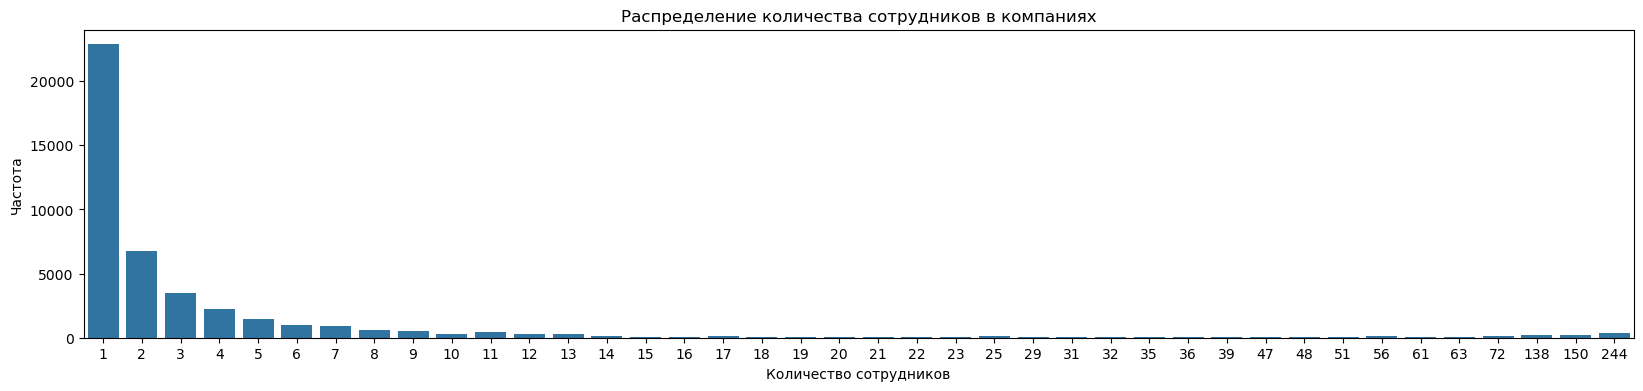

In [113]:
# Построим гистограму для визуализации распределения количества сотрудников в компаниях
plt.figure(figsize=(20, 4))
sns.countplot(x='count_people', data=people_education)

plt.title('Распределение количества сотрудников в компаниях')
plt.ylabel('Частота')
plt.xlabel('Количество сотрудников')

plt.show()

В основном в компаниях 1-3 сотрудника, хотя есть и компании с количеством сотрудников 244 (максимум). Разделим все компании на 7 групп:

In [116]:
# Создаем новый столбец, в котором компании будут делиться на 7 категорий по количеству сотрудников
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+'] 
people_education['count_employees_category'] = pd.cut(people_education['count_people'], bins=bins, labels=labels)

Теперь найдем долю сотрудников без инормации об образовании по каждой из категорий компаний.

In [119]:
# Создадим переменную, в которую запишем доли образованных сотрудников
educated_share = people_education.groupby('count_employees_category').agg({
    'educated': 'mean',
    'id_people': 'count'})

/var/folders/2z/n0xmygyn3zx87pgpnn7jvmdc0000gn/T/ipykernel_62397/964489521.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  educated_share = people_education.groupby('count_employees_category').agg({


In [120]:
# Переименуем столбец для ясности и добавим столбец с долей необразованных сотрудников
educated_share = educated_share.reset_index().rename(columns={'educated': 'educated_share',
                                                              'id_people': 'count_employees'
                                                             })
educated_share['non_educated_share'] = 1-educated_share['educated_share']

In [121]:
# Отсортируем результат по возрастанию доли образованных сотрудников
educated_share.sort_values(by='count_employees_category')

,count_employees_category,educated_share,count_employees,non_educated_share
0,1,0.633190,22862,0.366810
1,2,0.628980,6784,0.371020
2,3,0.616110,3501,0.383890
3,4-5,0.599409,3722,0.400591
4,6-10,0.573277,3323,0.426723
5,11-25,0.660640,1936,0.339360
6,26+,0.804921,1707,0.195079


Визуализируем распределение сотрудников без образования по категориям компаний с помощью столбчатой диаграммы.

<Figure size 1000x400 with 0 Axes>

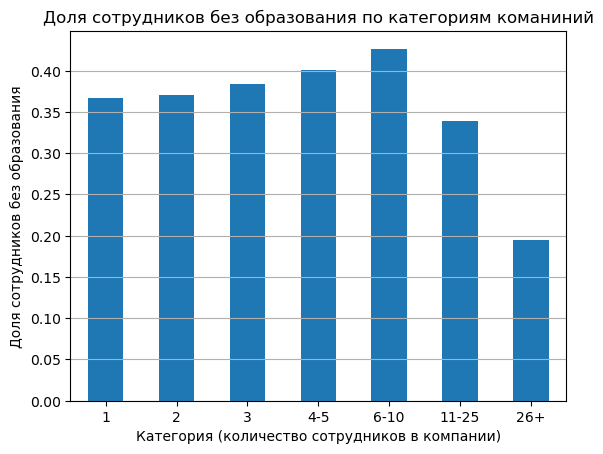

In [125]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 4))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
educated_share.sort_values(by='count_employees_category').plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               x='count_employees_category',
               y='non_educated_share',
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Доля сотрудников без образования по категориям команиний'
)

# Настраиваем оформление графика
plt.xlabel('Категория (количество сотрудников в компании)')
plt.ylabel('Доля сотрудников без образования')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

**Промедуточный вывод**:

Перед объединением датафреймы `people`, `education` были очищены от дубликатов. Мы объединили датафреймы  и получили 59.9% сотрудников без образования. Создали 7 категорий компаний в зависимости от их размера. Больше всего сотрудников без образования работают в компаниях с 6-10 сотрудниками: около 54% сотрудников. Меньше всего людей без образования (23%) в компаниях с количеством сотрудников более 26. В остальных группах 45-50% сотрудников не имеет информации об образовании.

Доля сотрудников без образования растет по мере увеличения количества сотрудников в компаниях, однако начиная в группах компаний по 11-25 и 26+ сотрудников есть тенденция к снижению количества сотрудников без образования.

### 2.3. Объединять или не объединять — вот в чём вопрос

Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.


In [132]:
# Удалим пропуски в датафреймах со столбцом network_username: company_and_rounds, fund, people перед созданием множеств
company_and_rounds_filtered = company_and_rounds.dropna(subset='network_username')
fund_filtered = fund.dropna(subset='network_username')
people_filtered = people.dropna(subset='network_username')

In [133]:
# Вычислим количество элементов в множестве ников датасета company_and_rounds
len(set(company_and_rounds_filtered['network_username']))

79571

In [134]:
# Вычислим количество элементов в множестве ников датасета fund
len(set(fund_filtered['network_username']))

2098

In [135]:
# Вычислим количество элементов в множестве ников датасета people
len(set(people_filtered['network_username']))

37154

In [136]:
# Количество элементов в пересечении множеств ников датасетов company_and_rounds, people и fund
len(set(company_and_rounds_filtered['network_username'].str.lower()).intersection(fund_filtered['network_username'].str.lower(), people_filtered['network_username'].str.lower()))

10

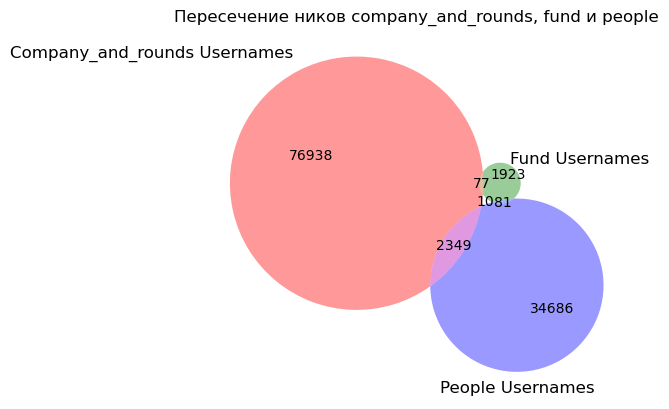

In [138]:
# Строим диаграмму Венна
venn3([set(company_and_rounds_filtered['network_username'].str.lower()), set(fund_filtered['network_username'].str.lower()), set(people_filtered['network_username'].str.lower())], set_labels=('Company_and_rounds Usernames', 'Fund Usernames', 'People Usernames'))

# Отображаем график
plt.title("Пересечение ников company_and_rounds, fund и people")
plt.show()

Общих элементов среди множеств значений `network_username` в датасетах `company_and_rounds`, `fund` и `people` всего 10 - это незначительное и поэтому случайное количество пересечений. Будем считать это совпадением.

Необходимо отметить, что `network_username` в датасете `people` - это ники пользователей в сети, в то время как `network_username` в датасетах `company_and_rounds` и `fund` - это ники компаний в сети. Поэтому пересечений настолько мало.

Визуализировали пересечение с помощью диаграммы Венна. Для объединения данных датасетов `company_and_rounds`, `fund` и `people` **в любых комбинациях** столбец `network_username` не подходит.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

Приведем данные в вид, который позволяет проводить анализ в разрезе отдельных компаний.


In [145]:
# Посмотрим датасет company_and_rounds методом info()
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [146]:
# Установим отображение до 30 столбцов на экране
pd.set_option('display.max_columns', 30)

In [147]:
# Выведем его на экран
company_and_rounds

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,id_company,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013


По наличию пропусков можно сделать вывод, что данный датасет образован соединением двух датасетов: один с информацией о компаниях, другой с информацией о раундах финансирования компаний. Было использовано outer-соединение, так как около 76% пропусков - это, вероятно, компании, данных о раундах финансирования которых не было во второй таблице, и эти поля заполнились пропускаим в итоговом датасете. Мы также видим 302 строки с информацией о раундах, но без информации о компаниях.
Чтобы привести данные в вид, удобный для работы и анализа, можно постараться восстановить два первичных датасета: сделать копию датасета без строк с пропусками в данных о компаниях, а затем удалить строки-дубликаты (если компания одна, а раундов финансирования несколько, то и строк об одной компании в датасете company_and_rounds столько же, сколько раундов ее финансирования).

Создадим датасет `company`  и оставим в нем только те столбцы, в которых содержатся данные о компаниях.

In [149]:
# Отфильтруем датасет company_and_rounds и оставим только строки без пропусков в поле company_id
company = company_and_rounds[ company_and_rounds['company_id'].notna() ]

In [150]:
# Оставим в новом датасете company только столбцы, содержащие данные о компаниях, и удали дубликаты по company_id 
company = company.iloc[:, 0:13].drop_duplicates(subset='company_id')

Теперь создадим второй датасет `rounds` и оставим в нем только данные о раундах финансирования компаний (удалив столбцы с данными о самих компаниях).

In [152]:
# Отфильтруем датасет company_and_rounds и оставим только строки без пропусков в поле funding_round_id
rounds = company_and_rounds[ company_and_rounds['funding_round_id'].notna() ]

In [153]:
# Оставим в новом датасете company только столбцы, содержащие данные о раундах финансирования компаний
rounds = rounds.iloc[:, 13:]

In [154]:
# Проверим пропуски в отфильтрованном датасете rounds
missing_stats = pd.DataFrame({'Кол-во пропусков': rounds.isnull().sum(),'Доля пропусков': rounds.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
print("\nПропуски в датасете 'rounds':")
print(missing_stats)


Пропуски в датасете 'rounds':
                Кол-во пропусков  Доля пропусков
funded_at                    248          0.0047
funded_at_year               248          0.0047


In [155]:
# Проверим пропуски в отфильтрованном датасете rounds
missing_stats = pd.DataFrame({'Кол-во пропусков': company.isnull().sum(),'Доля пропусков': company.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
print("\nПропуски в датасете 'company':")
print(missing_stats)


Пропуски в датасете 'company':
                  Кол-во пропусков  Доля пропусков
name                             1          0.0000
category_code                73367          0.3733
founded_at                  105326          0.5359
closed_at                   193933          0.9867
domain                       70008          0.3562
network_username            115962          0.5900
country_code                108563          0.5523


In [156]:
# Вычислим размер получившихся датасетов 
f'Количество строк в датасете company: {company.shape[0]}'

'Количество строк в датасете company: 196553'

In [157]:
# Вычислим размер получившихся датасетов 
f'Количество строк в датасете rounds: {rounds.shape[0]}'

'Количество строк в датасете rounds: 52928'

В результате фильтрации в датасете `company` мы оставили только те данные, где есть информация и о компании, выделив под каждую компанию лишь одну строку - получился датасет в 196553 строк. В датасете `rounds` мы оставили только столбцы с данными о раундах финансирования компаний - получился датасет в 52928 строк.

Мы максимальным образом сохранили данные, подготовили их так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

### Вывод по итогам Шага 2

- В результате анализа раундов финансирования по годам мы выяснили, что типичный размер средств, выделяемый в рамках одного раунда, был максимален в 2013 году. С 2004 до 2013 наблидается тенденция к увеличению количества раундов в год, а типичный размер средств в расчете на один раунд в период 2005-2012 имеет тенденцию к снижению. Скорее всего, общую сумму финансирования в году просто стали разбивать на бОльшее количество раундов, что и повлияло на снижение показателя финансирования в расчете на один раунд.
- Больше всего сотрудников без образования работают в компаниях с 6-10 сотрудниками: около 54% сотрудников. Меньше всего людей без образования (23%) в компаниях с количеством сотрудников более 26. В остальных группах 45-50% сотрудников не имеет информации об образовании.
Доля сотрудников без образования растет по мере увеличения количества сотрудников в компаниях, однако начиная с групп компаний по 11-25 и 26+ сотрудников есть тенденция к снижению количества сотрудников без образования.
- Выяснили, что для объединения данных датасетов `company_and_rounds`, `fund` и `people` в любых комбинациях столбец `network_username` не подходит.
- Датасет `company_and_rounds` был создан слиянием двух датасетов, в результате которого образовались лишние пропуски. В результате фильтрации в датасете мы получили 2 исходных датасета: `company` (информация и о компании) и `rounds` (с данными о раундах финансирования компаний).

## Шаг 3. Исследовательский анализ объединённых таблиц

### 3.1. Объединение данных
Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из нового датасета `company` и данные из таблицы `acquisition` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано acquired.

In [166]:
# Объединим таблицы, получим датасет с купленными компаниями и информацией об их покупке
company_and_acquisition = pd.merge(
    company,
    acquisition,
    left_on = 'company_id',
    right_on = 'acquired_company_id',
    how = 'left')

In [167]:
# Отфильтруем датасет по условию
company_and_acquisition = company_and_acquisition[
    (company_and_acquisition['funding_rounds'] > 0) |
    (company_and_acquisition['investment_rounds'] > 0) |
    (company_and_acquisition['status'] == 'acquired')
]

In [168]:
# Переименуем столбец id в acquisition_id
company_and_acquisition = company_and_acquisition.rename(columns={'id': 'acquisition_id'})

In [169]:
# Выведем инормацию о новом датасете
company_and_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40890 entries, 0 to 196695
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  acquisition_id      

В результате объединения получили новый датасет из 40890 строк и 19 столбцов с компаниями, которые меняли или готовы менять владельцев, и данными об их покупке, если такие данные были в таблице `acquisition`.

In [171]:
# Проверим новый датасет на дубликаты по company_id
company_and_acquisition.duplicated(subset='company_id').sum()

143

In [172]:
# Посмотрим на дубликаты
company_and_acquisition[company_and_acquisition.duplicated(subset='company_id', keep=False)].sort_values(by='company_id').head(30)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquisition_id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
4272,13.0,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0.0,4.0,18500000.0,5.0,4283.0,20.0,13.0,NaN,0.000000e+00,2007-05-30
4273,13.0,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0.0,4.0,18500000.0,5.0,5984.0,13.0,13.0,NaN,2.900000e+07,2009-04-01
173505,62.0,Skype,software,acquired,2003-08-01,NaT,skype.com,skype,LUX,3.0,5.0,76805000.0,6.0,5504.0,1242.0,62.0,cash,8.500000e+09,2011-05-10
173506,62.0,Skype,software,acquired,2003-08-01,NaT,skype.com,skype,LUX,3.0,5.0,76805000.0,6.0,5806.0,20.0,62.0,NaN,2.600000e+09,2005-09-12
185621,75.0,delicious,web,acquired,2003-09-01,NaT,delicious.com,Delicious,USA,0.0,1.0,0.0,6.0,8668.0,74819.0,75.0,NaN,0.000000e+00,2011-04-27
185620,75.0,delicious,web,acquired,2003-09-01,NaT,delicious.com,Delicious,USA,0.0,1.0,0.0,6.0,5451.0,29.0,75.0,cash,0.000000e+00,2005-12-01
4274,130.0,KickApps,enterprise,acquired,2004-03-01,NaT,kickapps.com,KickApps,USA,0.0,3.0,39007800.0,5.0,5073.0,475.0,130.0,NaN,0.000000e+00,2011-01-31
4275,130.0,KickApps,enterprise,acquired,2004-03-01,NaT,kickapps.com,KickApps,USA,0.0,3.0,39007800.0,5.0,9040.0,234881.0,130.0,NaN,0.000000e+00,2012-12-12
7972,142.0,Bebo,web,acquired,2005-01-06,NaT,bebo.com,Bebo_Official,USA,0.0,1.0,15000000.0,3.0,5955.0,5602.0,142.0,NaN,1.000000e+07,2010-06-17
7971,142.0,Bebo,web,acquired,2005-01-06,NaT,bebo.com,Bebo_Official,USA,0.0,1.0,15000000.0,3.0,213.0,351.0,142.0,cash,8.500000e+08,2008-03-13


143 дубликата при слиянии датасетов образовались потому, что одну компанию могла купить другая компания, а потом следующая и т. д. Видим, что это разные сделки, разные цены продажи, поэтому можно пока оставить эти дубликаты. Ведь в пункте 3.4 мы будем анализировать цены стартапов. Можно считать, что разные сделки - это покупки условно разных компаний, потому что компании развиваются, меняется их стоимоть, позиция на рынке и другие параметры.

### 3.2. Анализ выбросов
Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.
* По предобработанному столбцу funding_total графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
* Применимы ли к таким данным обычные способы нахождения типичных значений?

In [177]:
pd.set_option('display.float_format', '{:.6f}'.format)

In [178]:
# Выведем на экран основные статистические показатели funding_total
company_and_acquisition['funding_total'].describe()

count        40890.000000
mean      10135585.948594
std       56412886.909703
min              0.000000
25%              0.000000
50%         600000.000000
75%        5631320.000000
max     5700000000.000000
Name: funding_total, dtype: float64

In [179]:
# Создадим копию датафрейма, чтобы не работать с исходным
company_and_acquisition1 = company_and_acquisition.copy()

In [180]:
# Приведем столбец funding_total к милионам
company_and_acquisition1['funding_total'] = company_and_acquisition['funding_total'] / 1000000

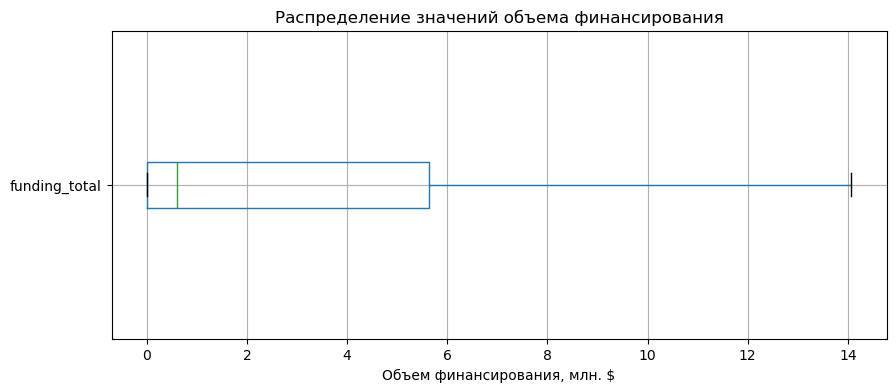

In [181]:
# Построим boxplot, чтобы визуализировать границы 25 и 75 процентилей и медиану
company_and_acquisition1.boxplot(column='funding_total', vert=False, grid=True, figsize=(10,4), showfliers=False )
plt.title('Распределение значений объема финансирования')
plt.ylabel('')
plt.xlabel('Объем финансирования, млн. $')

plt.show()

Как минимум 25% данных в столбце `funding_total` - это нули. То есть у 25% компаний нет информации о финансировании или финансирование было нулевым. Удалим эти строки, чтобы оценить объем финансирования компаний, у котрых он есть.

In [183]:
# Сохраним в новый датасет все строки, где funding_total не равен нулю
company_and_acquisition2 = company_and_acquisition1[company_and_acquisition1['funding_total'] != 0]

In [184]:
# Выведем на экран основные статистические показатели столбца  funding_total в новой таблице
company_and_acquisition2['funding_total'].describe()

count   27918.000000
mean       14.845050
std        67.758759
min         0.000291
25%         0.500000
50%         2.573200
75%        11.000000
max      5700.000000
Name: funding_total, dtype: float64

Половина данных принадлежит диапазону 0.5-11 млн. Максимальное значение 5.7 млрд , а среднее (14. 85 млн) сильно отличается от медианы (2.57 млн) - это значит, что есть значительные верхние выбросы. Среднее значение более чувствительно к выбросам, чем медиана. Стандартное отклонение в 67.8 млн говорит о большом разбросе значений показателя.

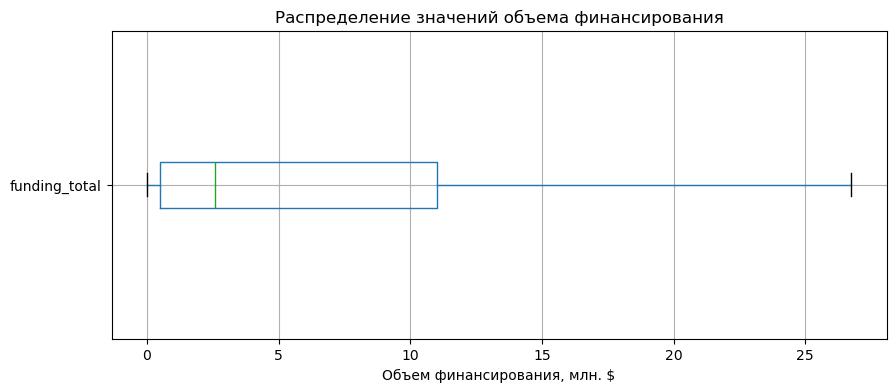

In [186]:
# Построим boxplot для данных funding_total в новом датафрейме
company_and_acquisition2.boxplot(column='funding_total', vert=False, grid=True, figsize=(10,4), showfliers=False )
plt.title('Распределение значений объема финансирования')
plt.ylabel('')
plt.xlabel('Объем финансирования, млн. $')

plt.show()

In [187]:
# Рассчитаем 1 и 3 квартили для столбца funding_total
Q1 = company_and_acquisition2['funding_total'].quantile(0.25)
Q3 = company_and_acquisition2['funding_total'].quantile(0.75)
# Квартильный размах
IQR = Q3 - Q1

# Рассчитаем границы выбросов
LOWER_bound = Q1 - 1.5 * IQR
UPPER_bound = Q3 + 1.5 * IQR

# Фильруем датасет, чтобы найти реальные границы выбросов, потомк что нижняя граница пока получилась отрицательной
FILTERED = company_and_acquisition2[
    (company_and_acquisition2['funding_total'] >= LOWER_bound) &
    (company_and_acquisition2['funding_total'] <= UPPER_bound)
]

# Находим реальные границы выбросов
print(f'Нижняя граница выбросров: {FILTERED['funding_total'].min()*1000000} тыс. $')
print(f'Верхняя граница выбросров: {FILTERED['funding_total'].max()} млн. $')

Нижняя граница выбросров: 291.0 тыс. $
Верхняя граница выбросров: 26.75 млн. $


Нули искажали статистику по столбцу funding_total. После их удаления можно сделать выводы:
- Максимальное значение 5.7 млрд - из-за наличия этого и других выбросов среднее значение смещено вправо и его нельзя считать типичным объемом финансирования.
- Типичный объем финансирования лучше охарактеризует медиана - 2.6 млн.
- Нетипичным, выбивающимся объемом финансирования, или выбросами для компании будем считать значения за пределами усов боксплота.

Проанализируем распределение данных с помощью гистограммы с логарифмической шкалой.

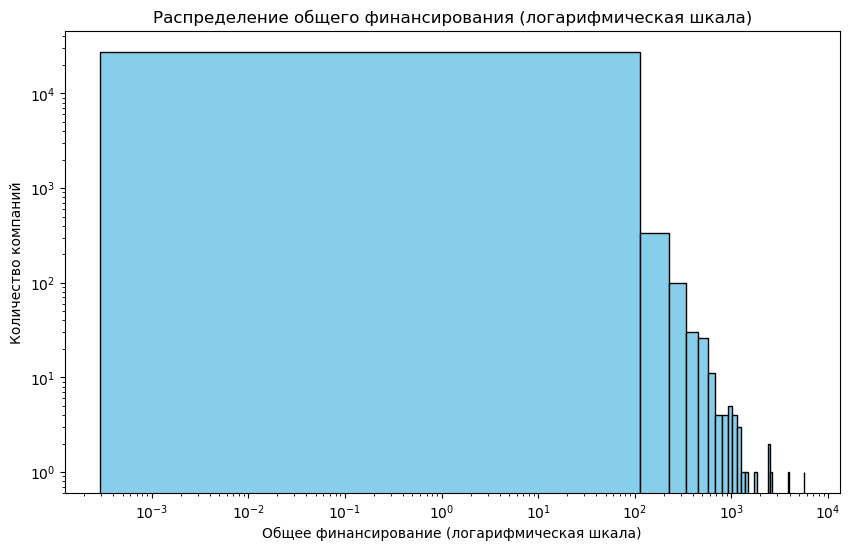

In [190]:
# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(company_and_acquisition2['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')
# Логарифмическая шкала по оси X 
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()

Большинство компаний получили небольшое финансирование (до 100 млн $). И лишь немногие компании получили большое финансирование. В финансировании стартапов это кажется нормальным, так как лишь немногие выдающиеся стартапы получают действительно значительные инвестиции.

### 3.3. Куплены забесплатно?
Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.
Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и укажем, каким процентилям границы соответствуют.

In [195]:
# Отфильруем датасет company_and_acquisition по условиям
company_and_acquisition_for01 = company_and_acquisition[
    ((company_and_acquisition['price_amount'] == 0) | (company_and_acquisition['price_amount'] == 1)) &
    (company_and_acquisition['funding_total'] > 0)
]

In [196]:
company_and_acquisition_for01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1618 entries, 66 to 196562
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1618 non-null   float64       
 1   name                  1618 non-null   object        
 2   category_code         1553 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   domain                1546 non-null   object        
 7   network_username      812 non-null    object        
 8   country_code          1536 non-null   object        
 9   investment_rounds     1618 non-null   float64       
 10  funding_rounds        1618 non-null   float64       
 11  funding_total         1618 non-null   float64       
 12  milestones            1618 non-null   float64       
 13  acquisition_id      

In [197]:
# Рассчитаем 1 и 3 квартили для столбца funding_total
q1 = company_and_acquisition_for01['funding_total'].quantile(0.25)
q3 = company_and_acquisition_for01['funding_total'].quantile(0.75)
# Квартильный размах
iqr = q3 - q1

# Рассчитаем границы выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Фильруем датасет, чтобы найти реальные границы выбросов, потомк что нижняя граница пока получилась отрицательной
filtered = company_and_acquisition_for01[
    (company_and_acquisition_for01['funding_total'] >= lower_bound) &
    (company_and_acquisition_for01['funding_total'] <= upper_bound)
]

# Находим реальные границы выбросов
lower_bound_real = filtered['funding_total'].min()
upper_bound_real = filtered['funding_total'].max()

# Вычисляем долю значений, меньше или равных границе
lower_pct = (company_and_acquisition_for01['funding_total'] <= lower_bound_real).mean()
upper_pct = (company_and_acquisition_for01['funding_total'] <= upper_bound_real).mean()

print(f'Нижняя граница выбросов: {lower_bound_real:.1f} соответствует примерно {lower_pct*100:.2f}-му процентилю')
print(f'Верхняя граница выбросов: {upper_bound_real:.1f} соответствует примерно {upper_pct*100:.2f}-му процентилю')

Нижняя граница выбросов: 3750.0 соответствует примерно 0.06-му процентилю
Верхняя граница выбросов: 35150000.0 соответствует примерно 90.91-му процентилю


В данном случае межквартильный размах не совсем корректно использровать  для определения нижней границы выбросов, так как, в первую очередь, наше распределение нельзя назвать нормальным, и есть выбросы. К тому же 25 процентиль - небольшое значение (2 млн) и при вычислении нижней границы выбросов мы получим сильно отрицательное значение. Финансирование не может быть отрицательным, поэтому за нижнюю границу выбросов мы приняли минимальное значение финансирования.

После фильтрации мы получили датасет в 1618 строк из компаний, купленных за 1 или 0 долларов, но с ненулевым финансированием. Вычислили границы выбросов: нижняя граница 3750.0 соответствует примерно 0.06-му процентилю, а верхняя граница 35.15 млн. соответствует примерно 90.91-му процентилю. Можно отметить, что 9% данных об объеме финансирования оказались выбросами.

### 3.4. Цены стартапов по категориям
Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:
- типично высокими ценами;
- и наибольшим разбросом цен за стартап.


In [202]:
# Мы будем работать со столбцом category_code - посчиаем пропуски в нем
company_and_acquisition['category_code'].isna().sum()

5454

In [203]:
# Сделаем копию датасета, чтобы не работать с исходным, и удалим строки с пропусками в category_code 
company_and_acq = company_and_acquisition.copy()
company_and_acq = company_and_acq.dropna(subset=['category_code'])

In [204]:
# Оставим только строки с ненулевыми значениями цен
company_and_acq = company_and_acq[(company_and_acq['price_amount'] != 0) & (company_and_acq['price_amount'].notna())]

In [205]:
#Выведем основные статистические показатели price_amount
company_and_acq.describe()['price_amount']

count            1998.000000
mean       1791410478.510010
min                 1.000000
25%          20000000.000000
50%          73785000.000000
75%         307750000.000000
max     2600000000000.000000
std       58185298221.164948
Name: price_amount, dtype: float64

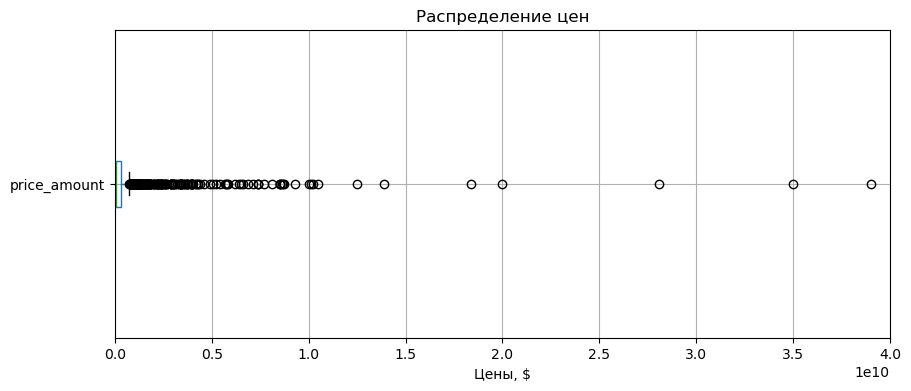

In [206]:
# Построим boxplot
company_and_acq.boxplot(column='price_amount', vert=False, grid=True, figsize=(10,4) )
plt.title('Распределение цен')
plt.ylabel('')
plt.xlabel('Цены, $')
plt.gca().set_xlim([0, 40000000000]) 

plt.show()

Видим аномальный выброс справа. Удалим его, так как покупка за 2.6 трлн - явно ошибка.

In [208]:
company_and_acq = company_and_acq[company_and_acq['price_amount'] < 26*10**11]

In [210]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [211]:
# Вычислим типичные цены и количество компаний для всех категорий стартапов
grouppedby_category_median = company_and_acq.groupby('category_code').agg({
    'price_amount': 'median',
    'company_id': 'count'})


In [212]:
# Вычислим разброс цен для каждой категории стартапов
grouppedby_category_std = company_and_acq.groupby('category_code').agg({
    'price_amount': 'std',
    'company_id': 'count'})

Отфильтруем полученные датасеты по количеству компаний в группе (репрезентативными будем считать группы по 10 и более компаний):

In [214]:
# Отфильтруем полученные датасеты
grouppedby_category_median = grouppedby_category_median[grouppedby_category_median['company_id'] >= 10]
grouppedby_category_std = grouppedby_category_std[grouppedby_category_std['company_id'] >= 10]

Будем считать категориями стартапов с высокими ценами категории с ценами выше 60-го процентиля.

In [216]:
# Выведем основные статистические показатели серии с типичными ценами
grouppedby_category_median.describe()

,price_amount,company_id
count,20.00,20.00
mean,114129500.00,96.40
std,75660231.40,100.11
min,32150000.00,10.00
25%,57687500.00,35.00
50%,95000000.00,72.50
75%,159250000.00,94.75
max,351000000.00,403.00


In [217]:
# Вычислим 60-й процентиль и отфильтруем grouppedby_category_median
q3 = grouppedby_category_median['price_amount'].quantile(0.6)

grouppedby_category_median_filtered = grouppedby_category_median[grouppedby_category_median['price_amount'] > q3]

In [218]:
# Выведем на экран категории стартапов с высокими ценами
grouppedby_category_median_filtered.loc[:,'price_amount'] = grouppedby_category_median_filtered.loc[:,'price_amount']/1000000
grouppedby_category_median_filtered

,price_amount,company_id
category_code,,
biotech,200.00,263
cleantech,185.00,39
ecommerce,157.50,50
finance,171.50,20
health,140.00,10
manufacturing,351.00,21
public_relations,110.00,74
security,164.50,36


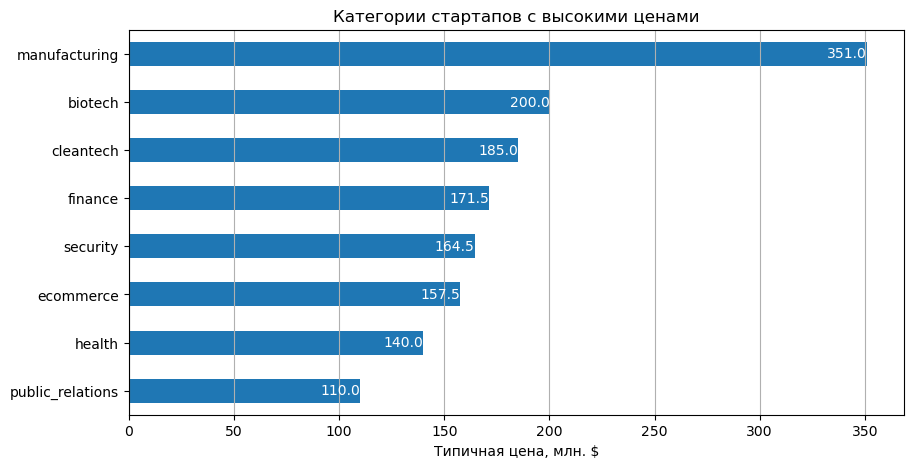

In [219]:
# Построим горизонтальную столбчатую диаграмму, чтобы визуализировать типичные цены по категориям стартапов
plt.figure(figsize=(10,5))

ax = grouppedby_category_median_filtered.sort_values(by='price_amount')['price_amount'].plot(
               kind='barh',
               rot=0, 
               legend=False, 
               title='Категории стартапов с высокими ценами'
)

# Добавление подписей над столбцами
for i, v in enumerate(grouppedby_category_median_filtered.sort_values(by='price_amount')['price_amount']):
    ax.text(v, i, str(round(v,2)), va='center', ha='right', fontsize=10, color='white')

plt.xlabel('Типичная цена, млн. $')
plt.ylabel('')
plt.grid(axis='x')

plt.show()

Аналогично найдем категории стартапов с высоким разбросом цен. Однако дополнительно отфильтруем цены выше 90-го квантиля, чтобы не учитывать самые высокие значения, многие из которых являются выбросами.

И найдем пересечения двух множеств: с категориями стартапов с высокими ценами и с высоким разбросом цен.

In [221]:
# Выведем основные статистические показатели серии с разбросами цен
grouppedby_category_std.describe()

,price_amount,company_id
count,20.00,20.00
mean,1401996510.60,96.40
std,1384033147.77,100.11
min,281425549.37,10.00
25%,690819575.26,35.00
50%,1091229657.16,72.50
75%,1498134387.96,94.75
max,6854337755.92,403.00


In [222]:
# Вычислим 60-й процентиль и отфильтруем grouppedby_category_std
q3 = grouppedby_category_std['price_amount'].quantile(0.6)
q90 = grouppedby_category_std['price_amount'].quantile(0.9)

grouppedby_category_std_filtered = grouppedby_category_std[(grouppedby_category_std['price_amount'] > q3) &
    (grouppedby_category_std['price_amount'] < q90)]

In [223]:
# Выведем на экран категории стартапов с высоким разбросом цен
grouppedby_category_std_filtered.loc[:,'price_amount'] = grouppedby_category_std_filtered.loc[:,'price_amount']/1000000
grouppedby_category_std_filtered

,price_amount,company_id
category_code,,
biotech,1968.20,263
enterprise,1602.10,115
games_video,1463.48,88
health,1927.10,10
mobile,1319.47,117
security,1378.44,36


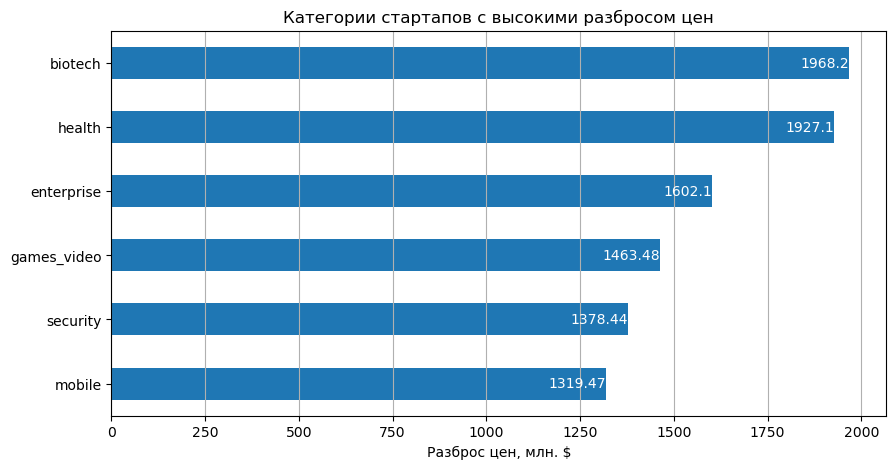

In [224]:
# Построим горизонтальную столбчатую диаграмму, чтобы визуализировать разброс цен по категориям стартапов
plt.figure(figsize=(10,5))

ax = grouppedby_category_std_filtered.sort_values(by='price_amount')['price_amount'].plot(
               kind='barh',
               rot=0, 
               legend=False, 
               title='Категории стартапов с высокими разбросом цен'
)

# Добавление подписей над столбцами
for i, v in enumerate(grouppedby_category_std_filtered.sort_values(by='price_amount')['price_amount']):
    ax.text(v, i, str(round(v,2)), va='center', ha='right', fontsize=10, color='white')

plt.xlabel('Разброс цен, млн. $')
plt.ylabel('')
plt.grid(axis='x')

plt.show()

Построим диаграмму рассеивания, где ось X - типичные цены, ось Y - разбросы цен, круги - категории стартапов, а их размер - количество стартапов в данной категории.

In [226]:
# Создаем датафрейм для построения диаграммы рассеивания
df = grouppedby_category_median.join(grouppedby_category_std, how='inner', lsuffix='_median', rsuffix='_std')
df = df.drop('company_id_std', axis=1)
df = df.rename(columns={'company_id_median': 'count_companies'})

/var/folders/2z/n0xmygyn3zx87pgpnn7jvmdc0000gn/T/ipykernel_62397/1208629796.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df['price_amount_median'][i]+5000000, df['price_amount_std'][i], idx, fontsize=8)


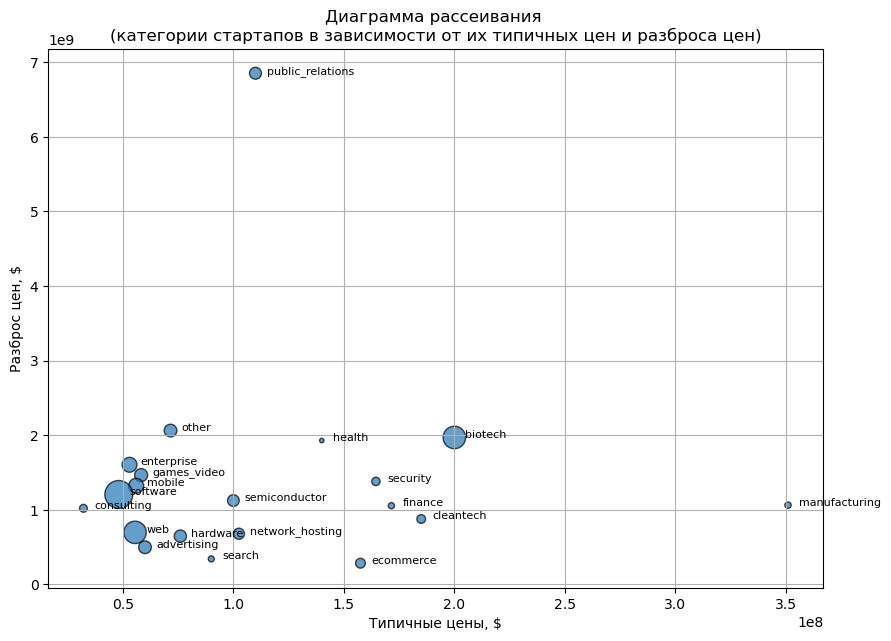

In [227]:
df.plot(
    kind='scatter',
    x='price_amount_median',
    y='price_amount_std',
    alpha=0.7,
    edgecolor='black',
    s='count_companies',
    title='Диаграмма рассеивания \n(категории стартапов в зависимости от их типичных цен и разброса цен)',
    figsize=(10, 7)
)

# Добавление подписей к точкам
for i, idx in enumerate(df.index):
    plt.text(df['price_amount_median'][i]+5000000, df['price_amount_std'][i], idx, fontsize=8)


plt.xlabel('Типичные цены, $')
plt.ylabel('Разброс цен, $')
plt.grid()
#plt.gca().set_xlim([0, 2.5*10**8])  
#plt.gca().set_ylim([0, 3*10**9]) 

plt.show()

Видим, что стартапы категорий `biotech`, `security` и `health` находятся выше и правее, чем 60% категорий как по типичным ценам, так и по разбросу цен. Самые большие инвестиции обычно в стартапы категории `manufacturing`, а самый широкий разброс цен на стартапы категории `public_relations`. А больше всего стартапов среди недорогих групп и с небольшим разбросом цен - в категории `software`, что можно объяснить: за первые 13 лет 21 века очень бурный рост показала индустрия ПО.

In [229]:
# Найдем пересечения двух множеств: с категориями стартапов с высокими ценами и с высоким разбросом цен
common_values = set(grouppedby_category_median_filtered.index) & set(grouppedby_category_std_filtered.index)
f'Категории стартапов с высокими ценами и высоким разбросом цен: {common_values}'

"Категории стартапов с высокими ценами и высоким разбросом цен: {'security', 'health', 'biotech'}"

Данные категории могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Мы считаем высокими цены и разброс выше 60 процентиля, потому что эти значения будут больше, чем другие 60 процентов данных. Таких групп по ценам и по разбросам получилось 10 и среди них мы обнаружили общие группы. В итоге мы можем рекомендовать крупным инвесторам 3 группы стартапов: `biotech`, `security` и `health`.

### 3.5. Сколько раундов продержится стартап перед покупкой
Проанализируем столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [234]:
# Для начала создадим копию датасета company_and_acquisition и удалим нулевые значения 
# раундов финансирования, так как нас интересуют компании, которые финансировались
company_and_acq_funded = company_and_acquisition.copy()
company_and_acq_funded = company_and_acq_funded[company_and_acq_funded['funding_rounds'] > 0]

In [235]:
company_and_acq_funded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31755 entries, 0 to 196695
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            31755 non-null  float64       
 1   name                  31755 non-null  object        
 2   category_code         30510 non-null  object        
 3   status                31755 non-null  object        
 4   founded_at            24508 non-null  datetime64[ns]
 5   closed_at             2114 non-null   datetime64[ns]
 6   domain                30219 non-null  object        
 7   network_username      19103 non-null  object        
 8   country_code          29610 non-null  object        
 9   investment_rounds     31755 non-null  float64       
 10  funding_rounds        31755 non-null  float64       
 11  funding_total         31755 non-null  float64       
 12  milestones            31755 non-null  float64       
 13  acquisition_id      

In [236]:
# Исследуем значения столбца funding_rounds
company_and_acq_funded['funding_rounds'].describe()

count   31755.00
mean        1.66
std         1.20
min         1.00
25%         1.00
50%         1.00
75%         2.00
max        15.00
Name: funding_rounds, dtype: float64

In [237]:
# Посчитаем типичные значения количества раундов для каждого возможного статуса стартапа
rounds_by_statuses = company_and_acq_funded.groupby('status')['funding_rounds'].agg(['mean','count'])
rounds_by_statuses

,mean,count
status,,
acquired,1.90,2641
closed,1.38,2089
ipo,2.53,490
operating,1.64,26535


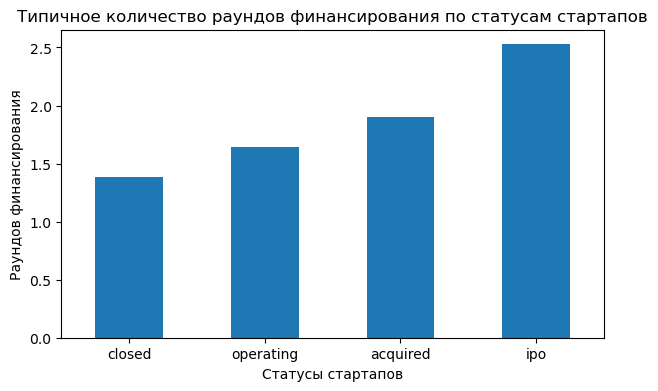

In [238]:
# Построим горизонтальную столбчатую диаграмму
plt.figure(figsize=(7,4))

rounds_by_statuses['mean'].sort_values().plot(
               kind='bar',
               rot=0, 
               legend=False, 
               title='Типичное количество раундов финансирования по статусам стартапов'
)

plt.xlabel('Статусы стартапов')
plt.ylabel('Раундов финансирования')

plt.show()

Минимум раундов финансирования для стартапов - 1, а максимум - 15. Среднее количество раундов по всем категориям - 1.66. Однако для компаний со статусом `acquired` среднее количество раундов - 1.9,  со статусом `ipo` - 2.53 раунда, тогда как для компаний со статусами `closed` и `operating` среднее количество раундов - 1.38 и 1.64, соответственно.
___

Построим график, который иллюстрирует кумулятивную вероятность приобретения стартапа в зависимости от количества проведенных раундов финансирования. Анализ такого графика поможет понять, как количество раундов финансирования связано с вероятностью того, что стартап будет приобретен.

In [355]:
# Кумулятивная сумма по всем стартапам
total_by_round = company_and_acq_funded.groupby('funding_rounds').size().cumsum()

# Кумулятивная сумма приобретенных стартапов
acquired_by_round = company_and_acq_funded[company_and_acq_funded['status'] == 'acquired'].groupby('funding_rounds').size().cumsum()

# Объединяем два Series по полному индексу и заполняем отсутствующие значения
common_index = total_by_round.index.union(acquired_by_round.index)

total_by_round = total_by_round.reindex(common_index, method='ffill').fillna(0)
acquired_by_round = acquired_by_round.reindex(common_index, method='ffill').fillna(0)

# Кумулятивная вероятность
cumulative_prob = (acquired_by_round / total_by_round)

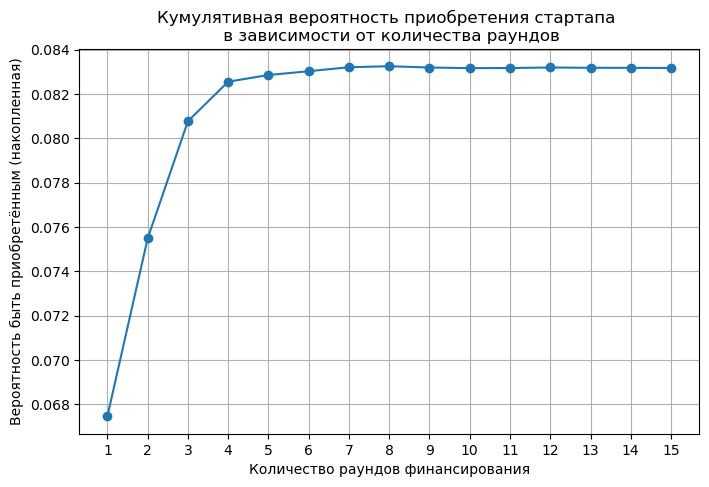

In [357]:
# Построим график
plt.figure(figsize=(8, 5))
plt.plot(cumulative_prob.index, cumulative_prob.values, marker='o')
plt.title('Кумулятивная вероятность приобретения стартапа \n в зависимости от количества раундов')
plt.xlabel('Количество раундов финансирования')
plt.ylabel('Вероятность быть приобретённым (накопленная)')
plt.grid()
plt.xticks(range(int(company_and_acq_funded['funding_rounds'].min()), int(company_and_acq_funded['funding_rounds'].max()) + 1))
plt.show()

Вероятность покупки стартапа стабильно растет до 3 раунда финансирования включительно. Вероятность покупки стартапов после 4 раунда финансирования не растет, а начиная с 13 раунда - резко падает до нуля. Можно сделать вывод, что стартапы чаще приобретаются на ранних стадиях (1-3 раунд), а поздние стадии реже ведут к покупке.

### Промежуточный вывод

Целью исследовательского анализа было ответить на вопросы заказчика о компаниях, которые меняли или готовы менять владельцев. Для достижения цели стояли задачи выяснить, какие таблицы объединить для получения необходимых данных, что означают покупки за 0 или за 1 доллар, какая цена в зависимости от категории стартапов и какое обычно количество раундов финансирования перед его покупкой.

**Результаты исследовательского анализа:**
- В результате объединения таблиц `company` и  `acquisition` получили новый датасет из 40890 строк и 19 столбцов с компаниями, которые меняли или готовы менять владельцев, и данными об их покупке, если такие данные были во второй таблице.
- Удалив строки с нулевыми занчениями объема финансирования, увидели, что из-за наличия выбросов (нетипичного, выбивающегося объема финансирования) среднее значение смещено вправо и его нельзя считать типичным объемом финансирования, который лучше охарактеризует медиана - 2.6 млн.
- Большинство компаний получили небольшое финансирование (до 100 млн $). И лишь немногие выдающиеся стартапы получают действительно значительные инвестиции.
- Исследание компаний, купленных за 1 или 0 долларов, но с ненулевым финансированием, показало, что нижняя граница выбросов 3750.0 соответствует примерно 0.06-му процентилю, а верхняя граница 35.15 млн. соответствует примерно 90.91-му процентилю. Можно отметить, что 9% данных об объеме финансирования оказались нетипичными, выбивающимися.
- 4 группы стартапов с самыми высокими ценами и разбросом данных по ценам: `public_relations`, `cleantech`, `network_hosting`, `nanotech`.
- Стартапы чаще приобретаются на ранних стадиях (1-3 раунд), а поздние стадии реже ведут к покупке.

Дополнительно можно провести анализ корреляции между различными характеристиками компаний, например: насколько сильно связан объем финансирования стартапа с категорией/сферой, к которой он принадлежит. Это поможет нам выявить заканамерности и взаимосвязи между различными данными.

## Шаг 4. Итоговый вывод и рекомендации
В ходе исследования были предобработаны, исследованы и проанализированы данные о 196553 стартапах. Данные включали информацию о компаниях, раундах их финансирования и покупках одних компанний другими, а также информацию о сотрудниках и их образовании.

**Главные выводы после предобработки:**
- Данные снам достались сырые, и предобработке можно посвятить большое количество времени, но для решения задач проекта, данных было достаточно.
- Пропусков в данных много, однако заполнить их достоверно не представляется возможным и в этом часто нет необходимости для решения задач проекта, поэтому оставили пропуски как есть.
- Типы данных успешно оптимизированы, столбца для объединения таблиц найдены.

**Главные выводы после предварительного исследнования:**
- Тенденция к увеличению количества раундов в год и тенденция к уменьшению типичного размера средств в расчете на один раунд, скорее всего, обусловлена тем, что  общую сумму финансирования в году просто стали разбивать на бОльшее количество раундов. Также это может быть связано с тем, что даже мелким стартапам стали выделять финансирование.
- Больше всего сотрудников без образования работают в компаниях с 6-10 сотрудниками: около 54% сотрудников. Меньше всего людей без образования (23%) в компаниях с количеством сотрудников более 26. В остальных группах 45-50% сотрудников не имеет информации об образовании.
Доля сотрудников без образования растет по мере увеличения количества сотрудников в компаниях, однако начиная с групп компаний по 11-25 и 26+ сотрудников есть тенденция к снижению количества сотрудников без образования.
- Выяснили, что для объединения данных датасетов `company_and_rounds`, `fund` и `people` в любых комбинациях столбец `network_username` не подходит.
- Датасет `company_and_rounds` был создан слиянием двух датасетов, в результате фильтрации мы получили 2 исходных датасета: `company` (информация и о компании) и `rounds` (с данными о раундах финансирования компаний).

**Главные выводы после исследовательского анализа данных:**
- Получили новый датасет с компаниями, которые меняли или готовы менять владельцев, и данными об их покупке.
- Лучше всего типичный объем финансирования характеризует медиана - 2.6 млн.
- - Большинство компаний получили небольшое финансирование (до 100 млн $). И лишь немногие выдающиеся стартапы получают действительно значительные инвестиции.
- Исследание компаний, купленных за 1 или 0 долларов, но с ненулевым финансированием, показало, что нижняя граница выбросов 3750.0 соответствует примерно 0.06-му процентилю, а верхняя граница 35.15 млн. соответствует примерно 90.91-му процентилю. То есть верхние 9% данных об объеме финансирования оказались нетипичными, выбивающимися.
- 3 группы стартапов с самыми высокими ценами и разбросом данных по ценам: `biotech`, `security` и `health`.
- Стартапы чаще приобретаются на ранних стадиях (1-3 раунд), а поздние стадии реже ведут к покупке.

**Рекомендации инвесторам на основе анализа данных:**
- Нормальный объем финансирования для стартапа - от 291 тыс. до 26.75 млн. Больше вкладывать рискованно. Меньше - бессмысленно.
- Мы можем рекомендовать крупным инвесторам, которые готовы к высоким рискам ради потенциально больших доходов, вкладывать деньги в стартапы, относящиеся к категориям `biotech`, `security` и `health`.
- Стартапы лучше покупать на 1-3 раунде финансирования.

Дополнительно можно провести анализ корреляции между различными характеристиками компаний, например: насколько сильно связан объем финансирования стартапа с категорией/сферой, к которой он принадлежит. Это поможет нам выявить заканамерности и взаимосвязи между различными данными.